# <font color = red > Marketing Campaign for Banking Products </font>

## Data Description : 

The file ***Bank_Personal_Loan_Modelling.xlsx*** contains data on **5000** customers. 
The data include customer demographic information (age, income, etc.), the customer's relationship 
with the bank (mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).

Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.



Steps involved in this machine learning project :
Following are the steps involved in creating a well-defined ML project:

- Understand and define the problem
- Analyse and prepare the data
- Apply the algorithms
- Reduce the errors
- Predict the result

# 1. Importing the datasets and libraries

Before we import our sample dataset into the notebook we will import the ***pandas , numpy , seaborn*** and ***matplotlib*** library .<br>
***pandas*** is an open source Python library that provides high-performance, easy-to-use data structures and data analysis tools .<br>
***pandas*** provides several methods for reading data in different formats. Here we’ll read it in as ***Excel*** file but you can read in ***CSV*** and ***JSON*** as well .

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

- Now the dataset file is stored in a variable named "excel_file" and then imported using pandas function ***pd.read_excel*** .<br>
There are 2 sheets as ***Description*** and ***Data*** in this excel file therefore we used sheet_name = Data .<br>
The dataset is stored in a variable named ***df*** .

In [2]:
excel_file = "Bank_Personal_Loan_Modelling.xlsx"
df = pd.read_excel(excel_file, sheet_name='Data')

## 1.1 Datatypes and shape of dataset


**Once we’ve imported the dataset, we need to wrangle the data to help answer the questions we have before . No dataset is perfect and that’s the reason we need to check the issues in this dataset and fix them .**<br>

- Let’s check how many columns and rows in this dataset by entering ***df.shape*** . 

In [3]:
df.shape

(5000, 14)

There are ___5000___ rows and ___14___ rows in this dataset .<br> 
Next, check the data type for each column by entering ***df.dtypes*** .

In [4]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

There are 12 features.The aim is to construct a model that can identify potential customers who have a higher probability 
of purchasing loan . Output column is personal loan . Features are detailed below : 

- __ID__ : Customer ID
- __Age__ : Customer's age in completed years
- __Experience__ : number years of professional experience
- __Income__ : Annual income of the customer
- __ZIPCode__ : Home Address ZIP code.
- __Family__ : Family size of the customer
- __CCAvg__ : Avg. spending on credit cards per month
- __Education__ : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- __Mortgage__ : Value of house mortgage if any.
- __Personal Loan__ : Did this customer accept the personal loan offered in the last campaign?
- __Securities Account__ : Does the customer have a securities account with the bank?
- __CD Account__ : Does the customer have a certificate of deposit (CD) account with the bank?
- __Online__ : Does the customer use internet banking facilities?
- __CreditCard__ : Does the customer use a credit card issued by UniversalBank?

- By entering ***df.head(10)*** we can review the first 10 entries in this dataset and ***df.tail(10)*** will display last 10 entries in our dataset .

In [5]:
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [6]:
df.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.000000,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.900000,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.500000,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.666667,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.000000,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.900000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.400000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.300000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.500000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.800000,1,0,0,0,0,1,1


- By using ***df.info()*** we wiil come to know that datatype of each column and also the non-null rows for each column .<br>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


## 1.2  Statistical summary of dataset

- By using ***df.describe()*** we will get the summary stat which includes the count , mean , std , min , max , etc.

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## 1.3 Null values and Unique values in columns of dataset

- To display how many null values are present in each column we will use ***df.isnull().sum()*** .

In [9]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

- Often while working with a big data frame in pandas , we might have a column with string/characters and we want to find the number of unique elements present in the column . We can use Pandas ***unique()*** function on a variable of interest to get the unique values of the column .
- ***Unique values*** in each column of our dataset

In [10]:
print("\nUnique Values in each column : \n")
print("Age ----------------> " + str(len(df['Age'].unique().tolist())))
print("Experience ---------> " + str(len(df['Experience'].unique().tolist())))
print("Income -------------> " + str(len(df['Income'].unique().tolist())))
print("ZIP Code -----------> " + str(len(df['ZIP Code'].unique().tolist())))
print("Family -------------> " + str(len(df['Family'].unique().tolist())))
print("CCAvg --------------> " + str(len(df['CCAvg'].unique().tolist())))
print("Education ----------> " + str(len(df['Education'].unique().tolist())))
print("Mortgage -----------> " + str(len(df['Mortgage'].unique().tolist())))
print("Personal Loan-------> " + str(len(df['Personal Loan'].unique().tolist())))
print("Securities Account -> " + str(len(df['Securities Account'].unique().tolist())))
print("CD Account ---------> " + str(len(df['CD Account'].unique().tolist())))
print("Online -------------> " + str(len(df['Online'].unique().tolist())))
print("CreditCard ---------> " + str(len(df['CreditCard'].unique().tolist())) + "\n")


Unique Values in each column : 

Age ----------------> 45
Experience ---------> 47
Income -------------> 162
ZIP Code -----------> 467
Family -------------> 4
CCAvg --------------> 108
Education ----------> 3
Mortgage -----------> 347
Personal Loan-------> 2
Securities Account -> 2
CD Account ---------> 2
Online -------------> 2
CreditCard ---------> 2



# 2. Cleaning the data for any of the variables .


***Correlation coefficients*** quantify the association between variables or features of a dataset . 
These statistics are of high importance for science and technology
It measures the strength of the linear relationship between two variables . 
It is used to discover collinearity between features, which may undermine the quality of a model .
The correlation coefficient is directly linked to the beta coefficient in a ***linear regression*** (= the slope of a best-fit line), but has the advantage of being standardized between ***-1 to 1 .***

In [11]:
personal_loan = df['Personal Loan']
age = df['Age']
correlation = personal_loan.corr(age)
correlation

-0.00772561717353405

In [12]:
personal_loan = df['Personal Loan']
mortgage = df['Mortgage']
correlation = mortgage.corr(age)
correlation

-0.012538586859833936

In [13]:
experience = df['Experience']
age = df['Age']
correlation = experience.corr(age)
correlation

0.9942148569683319

<AxesSubplot:>

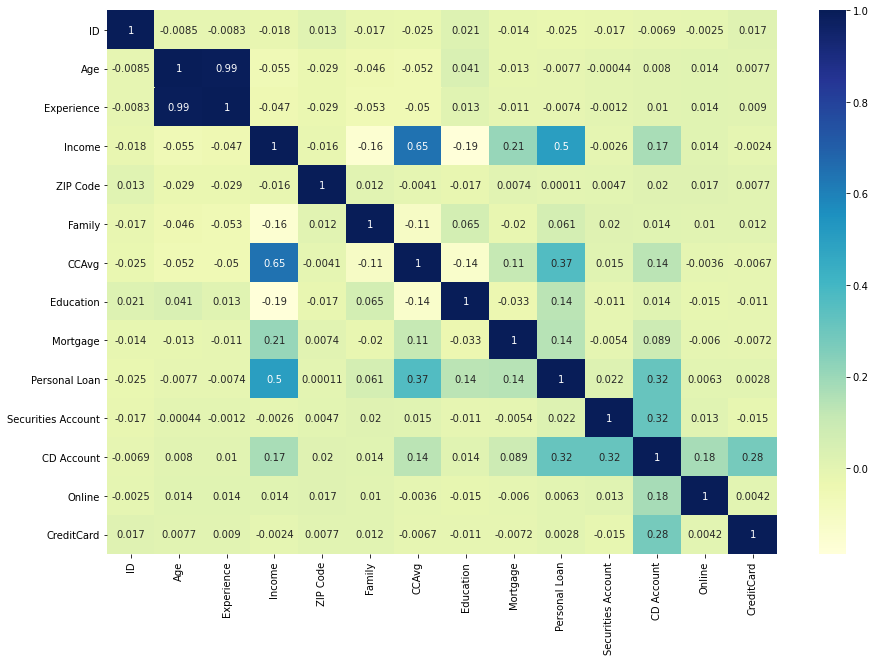

In [14]:
bank_corr = df.corr()
plt.subplots(figsize =(15, 10)) 
sns.heatmap(bank_corr,cmap="YlGnBu",annot=True)

***In a machine learning,it is neccessary to seperate signal from the noice . Hence the ID column which definitely doesn't have any signal is being dropped . Also , the experience column seens to have faulty data as soon values are negative . We can replace and impute those values , but we choose to drop this column as well , as it seems to be highly correlated with the age column .***

In [15]:
df = df.drop(['ID' , 'Experience'] , axis = 1 )
df.head(10)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,180,93023,1,8.9,3,0,1,0,0,0,0


In [16]:
df.tail(10)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,55,58,95023,4,2.000000,3,219,0,0,0,0,1
4991,51,92,91330,1,1.900000,2,100,0,0,0,0,1
4992,30,13,90037,4,0.500000,3,0,0,0,0,0,0
4993,45,218,91801,2,6.666667,1,0,0,0,0,1,0
4994,64,75,94588,3,2.000000,3,0,0,0,0,1,0
4995,29,40,92697,1,1.900000,3,0,0,0,0,1,0
4996,30,15,92037,4,0.400000,1,85,0,0,0,1,0
4997,63,24,93023,2,0.300000,3,0,0,0,0,0,0
4998,65,49,90034,3,0.500000,2,0,0,0,0,1,0
4999,28,83,92612,3,0.800000,1,0,0,0,0,1,1


# 3. Exploratory Data Analysis ( EDA )

Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics . It is used to understand data , get some context regarding it , understand the variables and the relationships between them , and formulate hypotheses that could be useful when building predictive models .


## 3.1 Number of unique in each column .

The unique values in each columns can be seen by using ***df.nunique()*** .

In [17]:
df.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

ZIP Code has 467 distict values . It is a nominal variable which has too many levels . Therefore it is better to drop ZIP Code as well .

In [18]:
df = df.drop(['ZIP Code'] , axis = 1 )
df.head(10)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
5,37,29,4,0.4,2,155,0,0,0,1,0
6,53,72,2,1.5,2,0,0,0,0,1,0
7,50,22,1,0.3,3,0,0,0,0,0,1
8,35,81,3,0.6,2,104,0,0,0,1,0
9,34,180,1,8.9,3,0,1,0,0,0,0


## 3.2 Number of people with zero mortgage .

To find the number of people with zero mortgage we will use ***value_counts()*** method .  


In [19]:
df['Mortgage'].value_counts(dropna = False)

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

In [20]:
(df.Mortgage == 0).sum()

3462

From the above analysis we come know that the number of people with zero mortgage is ***3462*** .  

## 3.3 Number of people with zero credit card spending per month .

In [21]:
df['CreditCard'].value_counts(dropna = False)

0    3530
1    1470
Name: CreditCard, dtype: int64

In [22]:
(df.CreditCard == 0).sum()

3530

From the above analysis we come know that the number of people with  zero credit card spending per month is ***3530***.

## 3.4 Value counts of all categorical columns .


The ***value_counts()*** method returns a Series containing the counts of unique values. This means , for any column in a dataframe , this method returns the count of unique entries in that column.

In [23]:
df['Age'].value_counts(ascending = True , dropna = False)

67     12
23     12
66     24
24     28
25     53
26     78
64     78
65     80
27     91
28    103
37    106
36    107
63    108
53    112
47    113
49    115
38    115
48    118
33    120
32    120
44    121
61    122
29    123
62    123
55    125
31    125
40    125
42    126
46    127
45    127
60    127
51    129
57    132
59    132
39    133
34    134
56    135
30    136
41    136
50    138
54    143
58    143
52    145
43    149
35    151
Name: Age, dtype: int64

In [24]:
df['Income'].value_counts(ascending = True , dropna = False)

218     1
224     1
205     2
202     2
189     2
       ..
39     81
41     82
81     83
38     84
44     85
Name: Income, Length: 162, dtype: int64

In [25]:
df['Family'].value_counts(ascending = True , dropna = False)

3    1010
4    1222
2    1296
1    1472
Name: Family, dtype: int64

In [26]:
df['CCAvg'].value_counts(ascending = True , dropna = False)

9.300000      1
8.900000      1
4.666667      1
5.333333      1
8.200000      1
           ... 
0.800000    187
2.000000    188
0.200000    204
1.000000    231
0.300000    241
Name: CCAvg, Length: 108, dtype: int64

In [27]:
df['Education'].value_counts(dropna = False)

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [28]:
df['Mortgage'].value_counts(ascending = True , dropna = False)

577       1
485       1
505       1
509       1
541       1
       ... 
83       16
119      16
103      16
98       17
0      3462
Name: Mortgage, Length: 347, dtype: int64

In [29]:
df['Securities Account'].value_counts(ascending = True , dropna = False)

1     522
0    4478
Name: Securities Account, dtype: int64

In [30]:
df['CD Account'].value_counts(ascending = True , dropna = False)

1     302
0    4698
Name: CD Account, dtype: int64

In [31]:
df['Online'].value_counts(ascending = True , dropna = False)

0    2016
1    2984
Name: Online, dtype: int64

In [32]:
df['CreditCard'].value_counts(ascending = True , dropna = False)

1    1470
0    3530
Name: CreditCard, dtype: int64

## 3.4 Univariate and Bivariate analysis

__Exploratory Data Analysis is majorly performed using the following methods__ : <br><br>
1.__Univariate analysis__ : provides summary statistics for each field in the raw data set (or) summary only on one variable. Ex:- CDF,PDF,Box plot, Violin plot .<br><br>
2.__Bivariate analysis__ : is performed to find the relationship between each variable in the dataset and the target variable of interest (or) using 2 variables and finding realtionship between them.Ex:-Box plot,Voilin plot .<br><br>
3.__Multivariate analysis__ : is performed to understand interactions between different fields in the dataset (or) finding interactions between variables more than 2 . Ex:- Pair plot and 3D scatter plot.

The univariate distribution plots are graphs where we plot the histograms along with the estimated probability density function over the data . It’s one of the simplest techniques where we consider a single variable and observe its spread and statical properties . The univariate analysis for numerical and categorical attributes are different .

Family            1     2    3     4
Personal Loan                       
0              1365  1190  877  1088
1               107   106  133   134


<AxesSubplot:xlabel='Family', ylabel='count'>

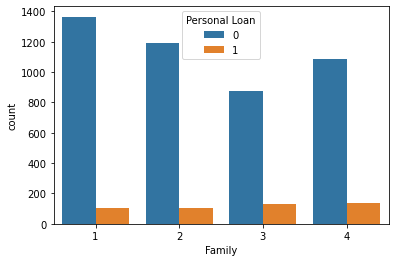

In [33]:
print(pd.pivot_table(data = df , index = 'Personal Loan' , columns = 'Family' , aggfunc = 'size'))
sns.countplot(x ='Family' , data = df , hue = 'Personal Loan')

Education         1     2     3
Personal Loan                  
0              2003  1221  1296
1                93   182   205


<AxesSubplot:xlabel='Education', ylabel='count'>

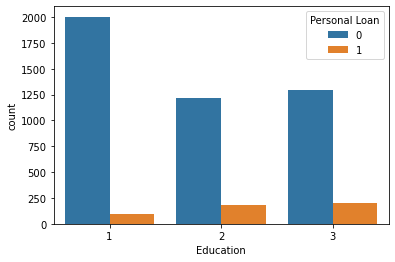

In [34]:
print(pd.pivot_table(data = df,index = 'Personal Loan', columns = 'Education' , aggfunc = 'size'))
sns.countplot(x = 'Education', data = df , hue = 'Personal Loan')

0    4520
1     480
Name: Personal Loan, dtype: int64


<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

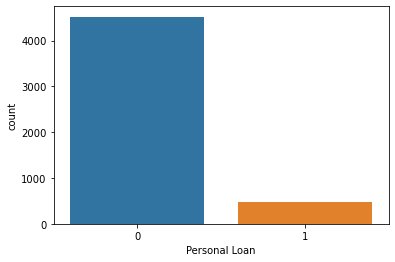

In [35]:
print(df['Personal Loan'].value_counts())
sns.countplot(x = 'Personal Loan' , data = df)

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

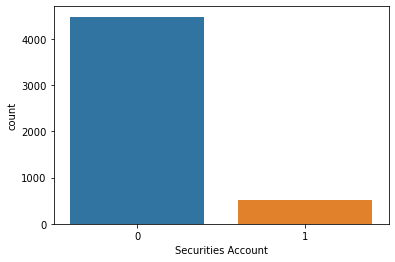

In [36]:
sns.countplot(df["Securities Account"])

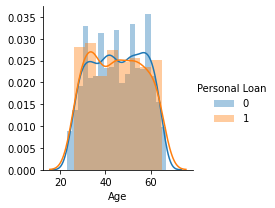

In [37]:
sns.FacetGrid(df, hue = "Personal Loan").map(sns.distplot,"Age").add_legend()

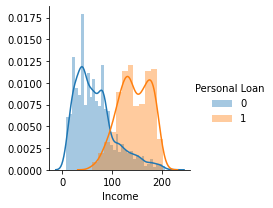

In [38]:
sns.FacetGrid(df, hue = "Personal Loan").map(sns.distplot,"Income").add_legend()

## 4. Necessary transformations for the feature variables


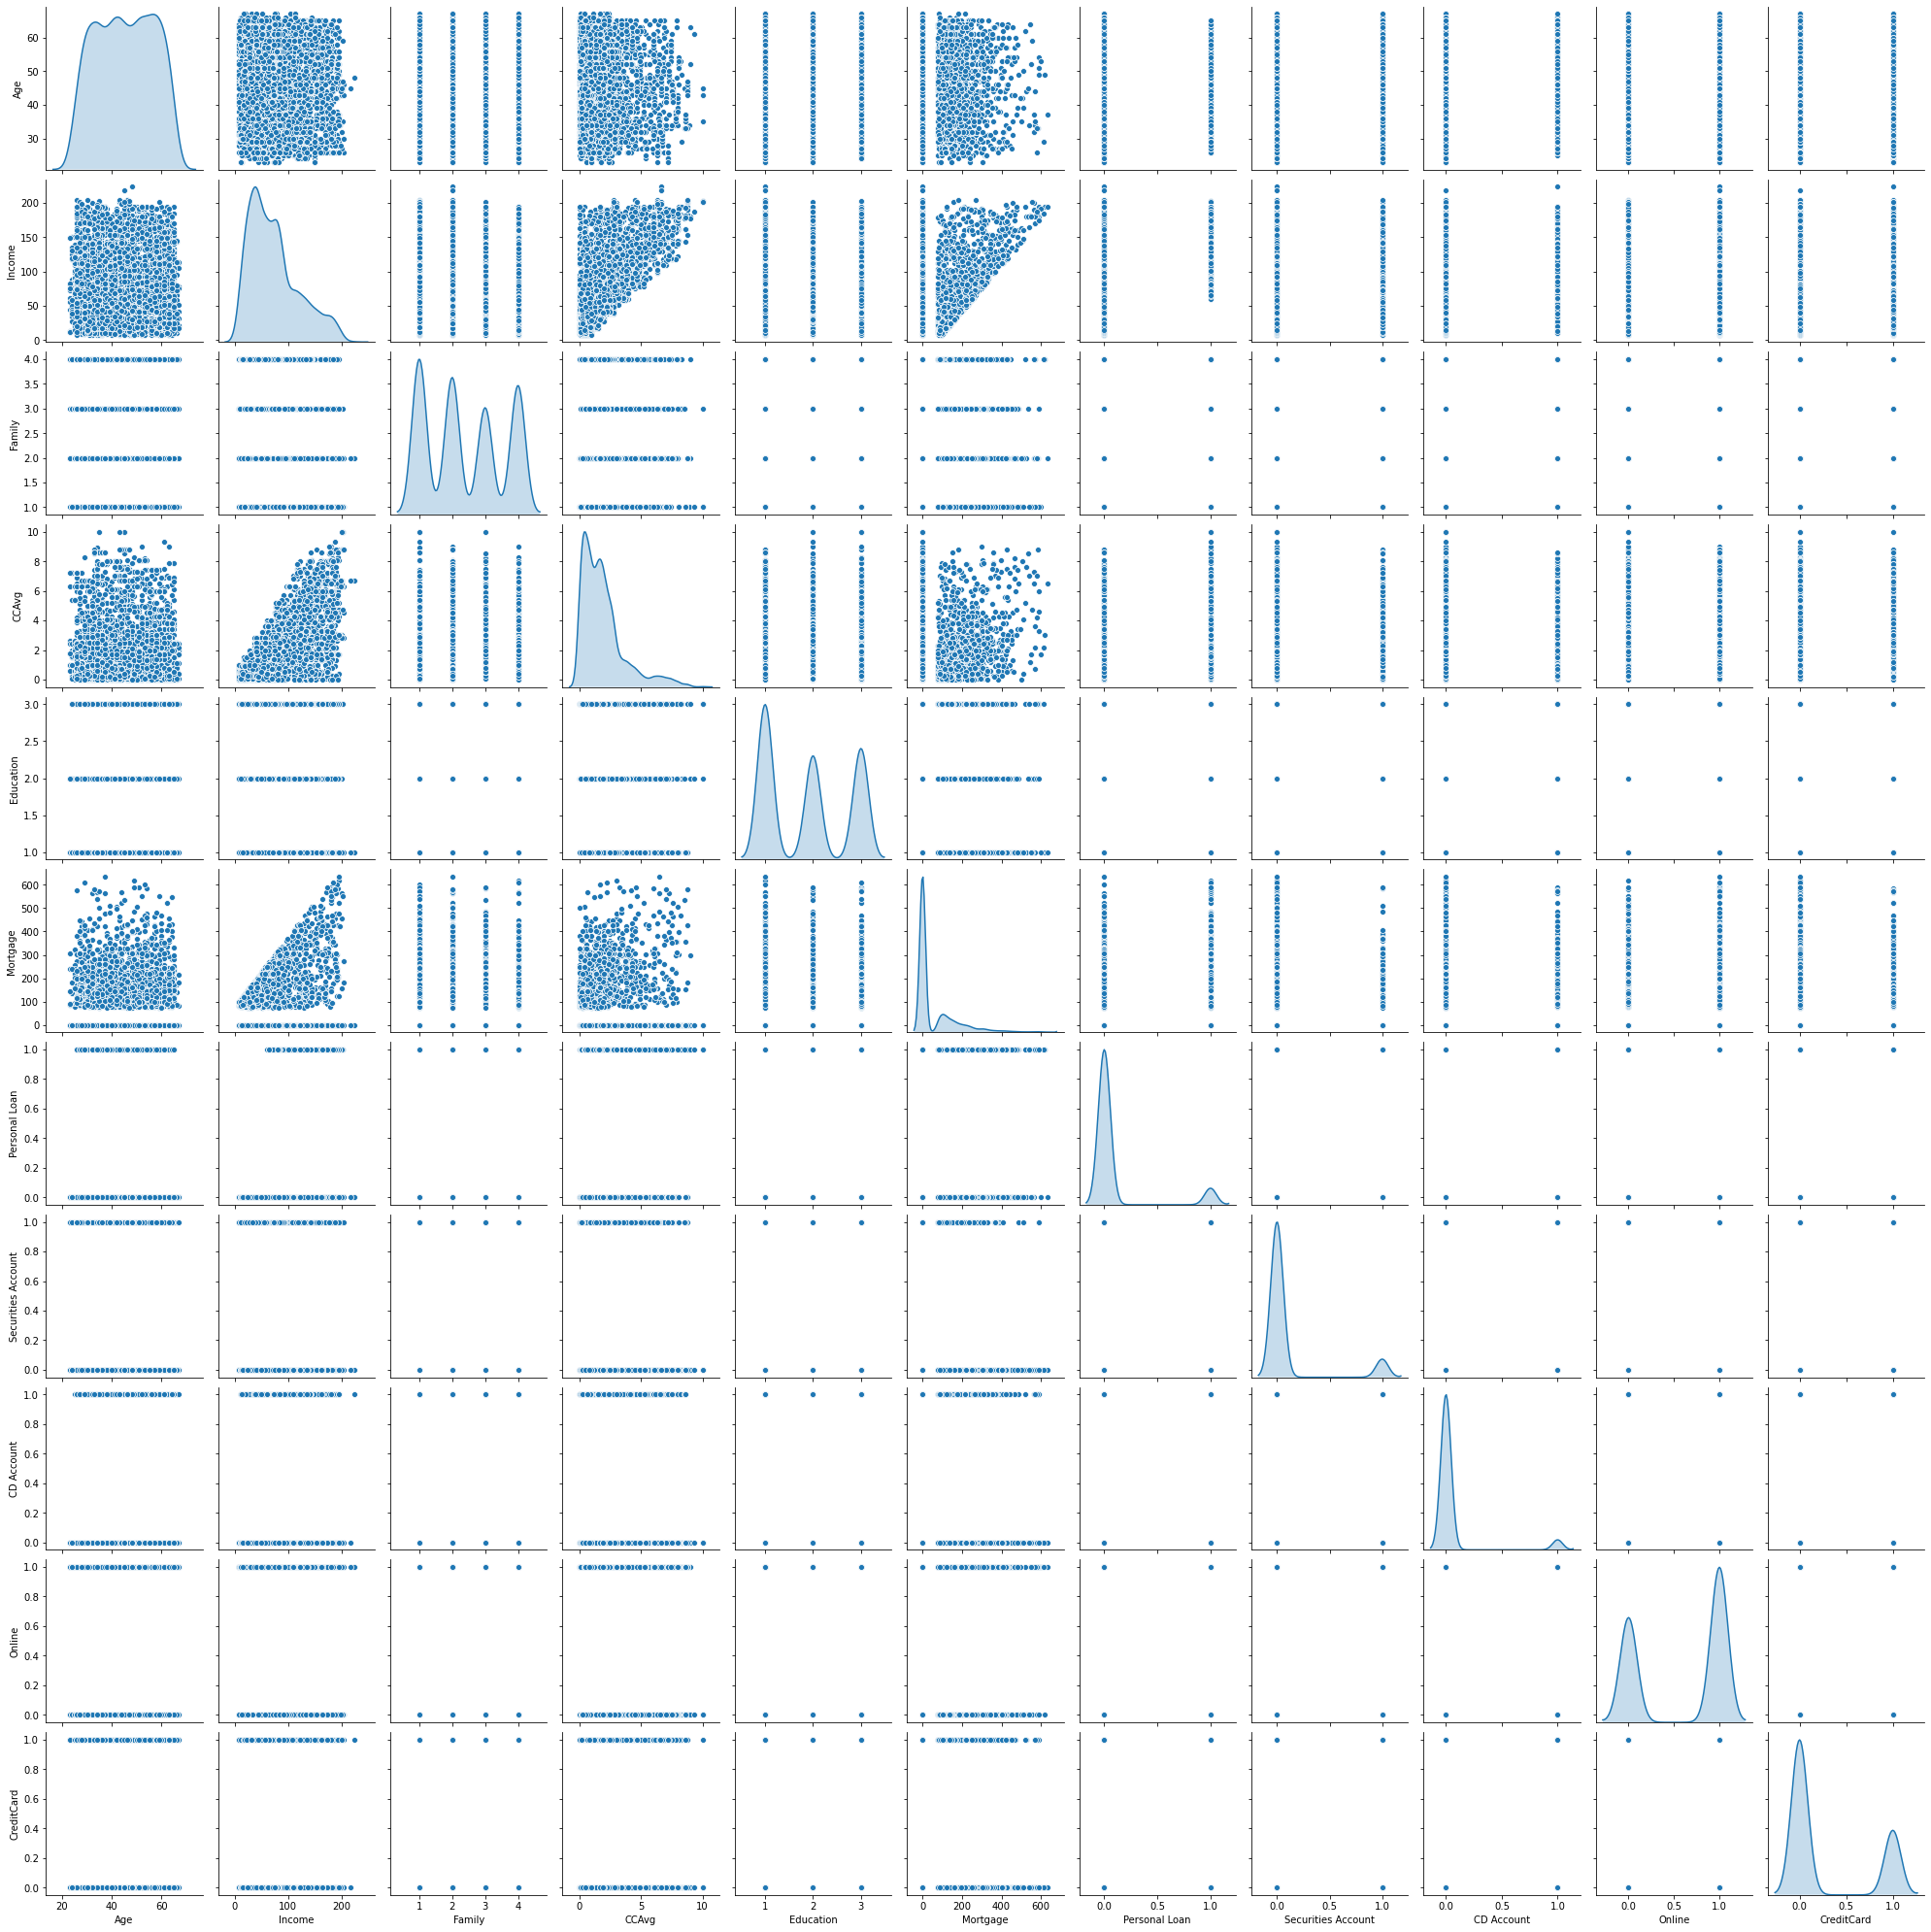

In [39]:
sns.pairplot(df , diag_kind = 'kde')

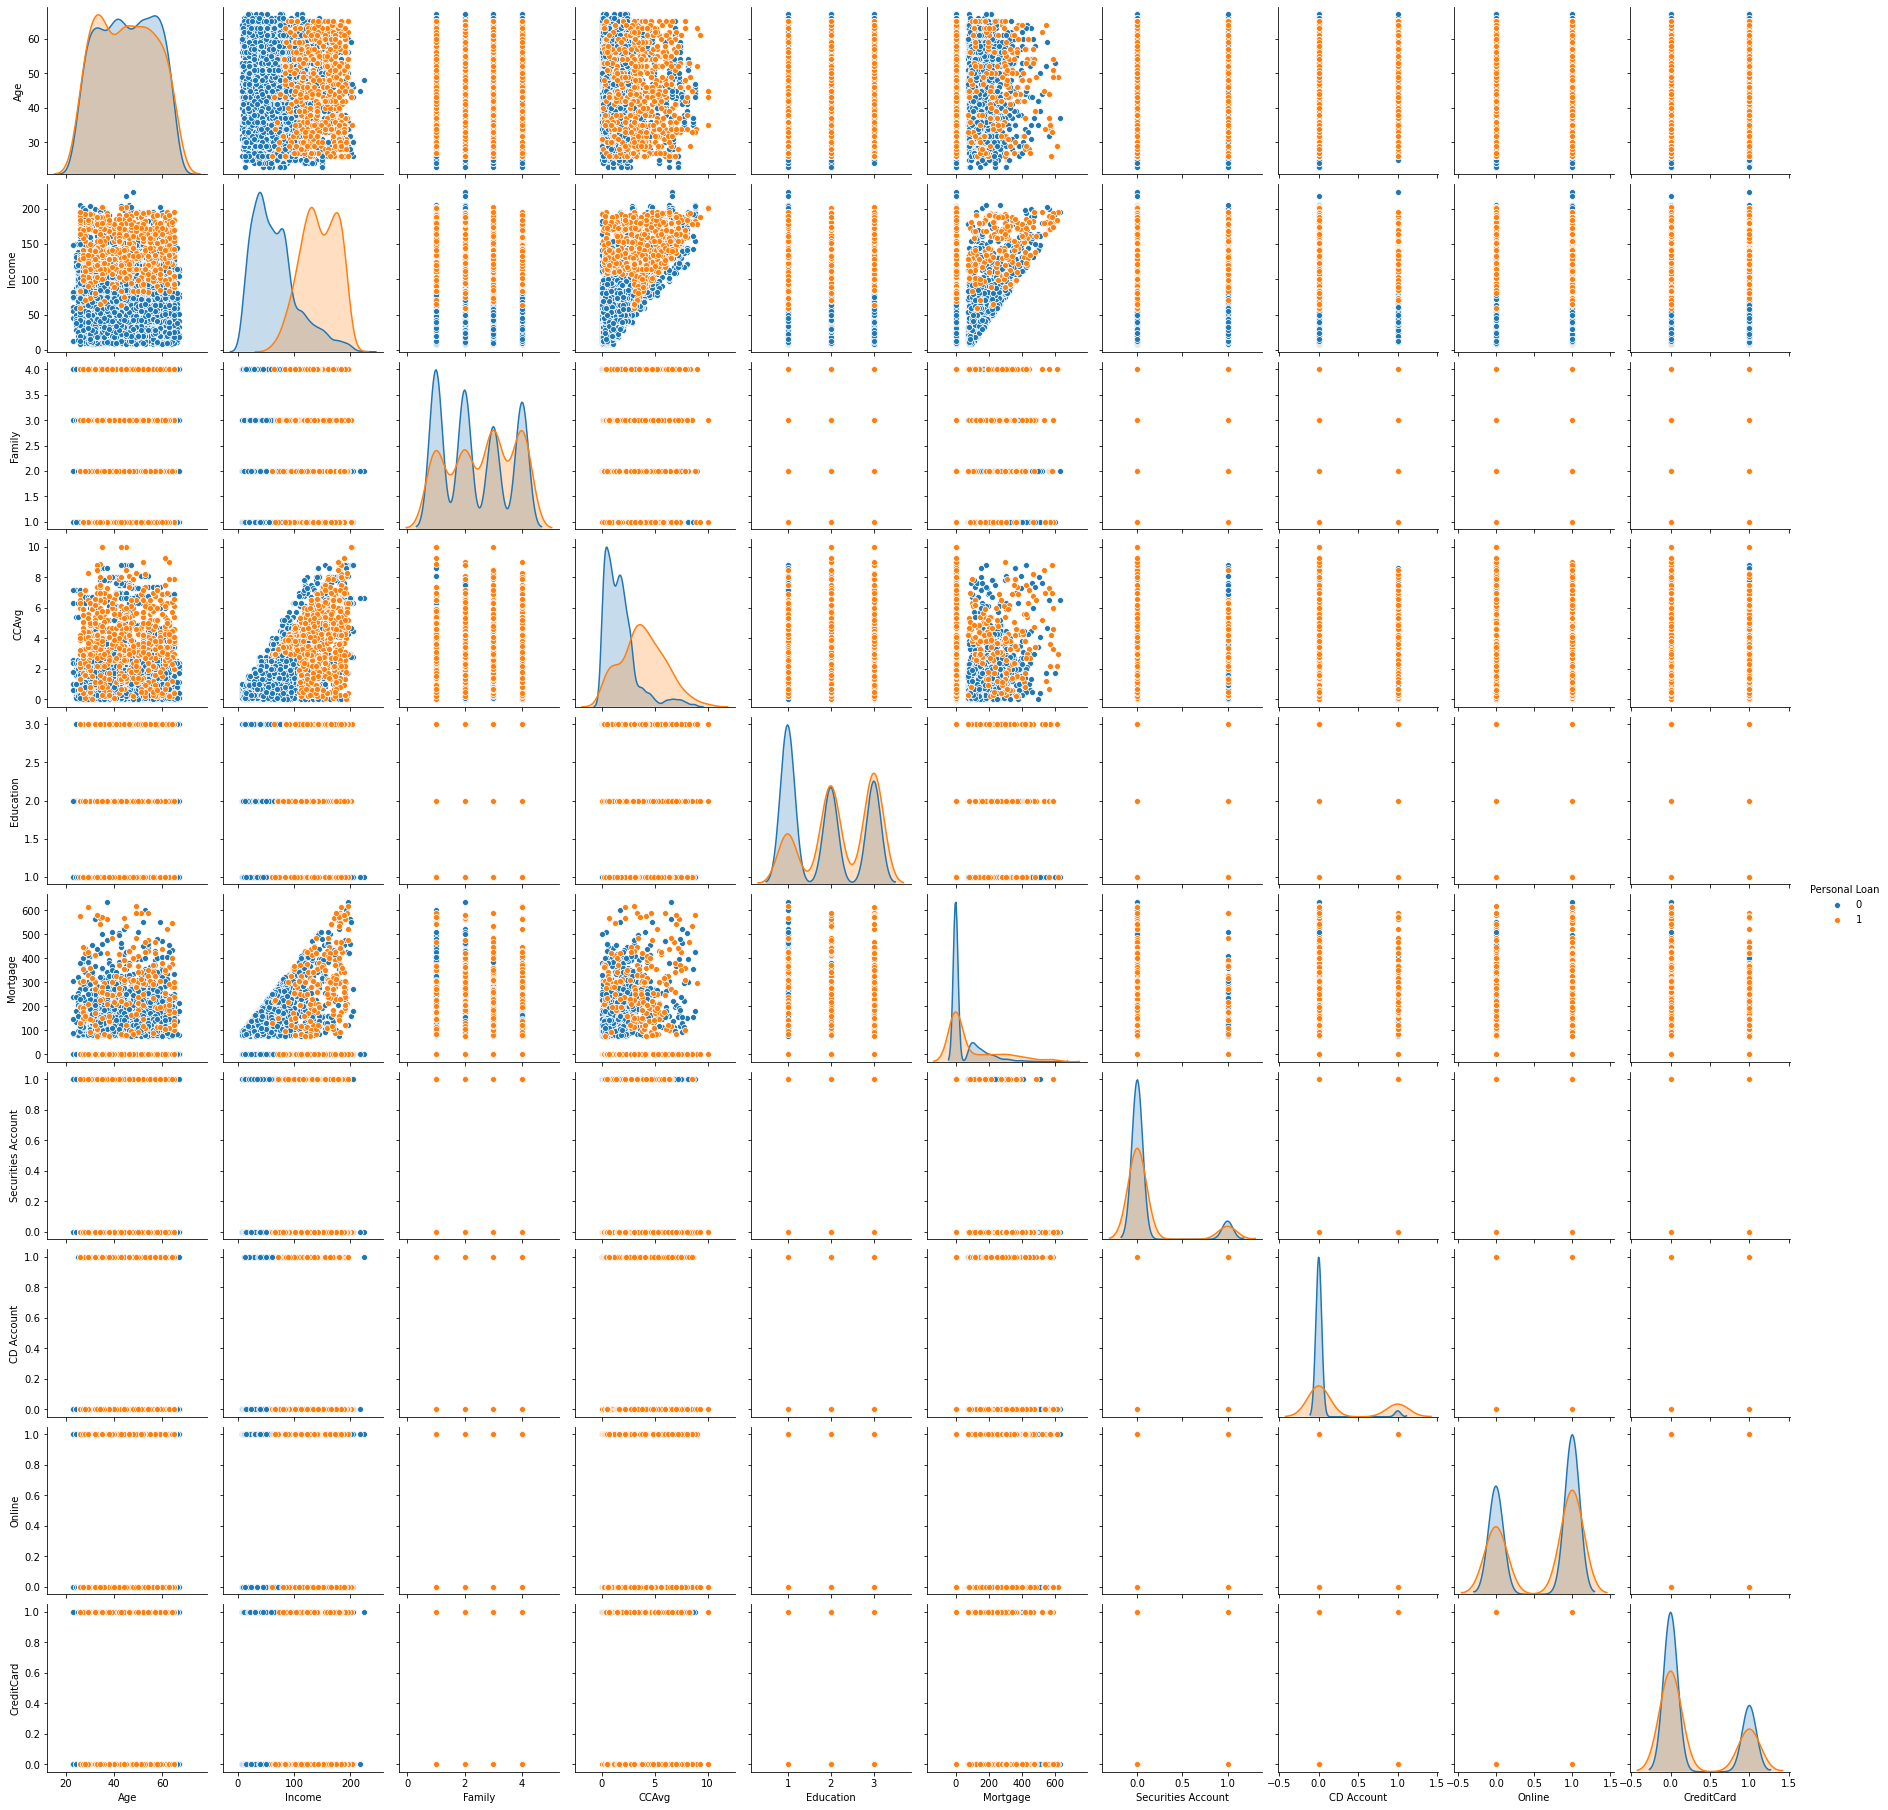

In [40]:
sns.pairplot(df , diag_kind = 'kde',hue = 'Personal Loan')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   Family              5000 non-null   int64  
 3   CCAvg               5000 non-null   float64
 4   Education           5000 non-null   int64  
 5   Mortgage            5000 non-null   int64  
 6   Personal Loan       5000 non-null   int64  
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


In [42]:
# Creating a copy of dataframe for manipulation
df_Bank = df

 ## 5. Split the data into training and test set in the ratio of 70:30 respectively

Normalization

Below python code has been used in order to implement the normalization in the present dataset. The scale of the values of all the columns have been normalized in between 0 and 1.

In [45]:
from sklearn import preprocessing
import pandas as pd
x = df.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_Norm = pd.DataFrame(x_scaled)

df_Norm.columns = ['Age_Norm', 'Income_Norm', 'Family_Norm', 'CCAvg_Norm', 'Education_Norm', 'Mortgage_Norm', 'Personal_Loan_Norm', 'Securities_Account_Norm', 'CD_Account_Norm', 'Online_Norm', 'CreditCard_Norm']

Heatmap plot after doing the normalizing the scale of all the columns in between range 0 and 1

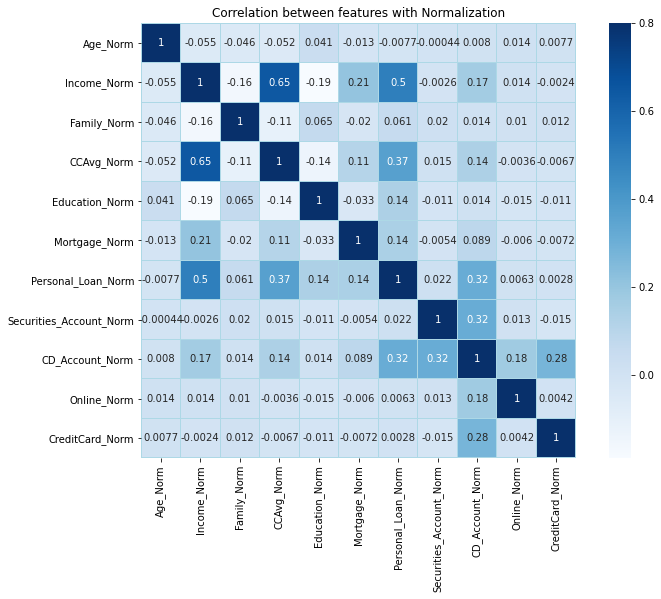

In [46]:
corr = df_Norm.corr()
plt.figure(figsize=(12, 8))

sns.heatmap(corr, 
            vmax=.8, 
            linewidths=0.01,
            square=True,
            annot=True,
            cmap='Blues',
            linecolor="lightblue")
plt.title('Correlation between features with Normalization');

Even though the scale has been normalized in a scale of 0 and 1, no significant differences have been found in the pearson correlation coefficients between multple independent variables. Henceforth, it can be concluded that normalization did not play any significant role in data preprocessing.

## 6. Below are the models been used to predict the status of the loan. ( whether it is issued or not ? )

1. Logistic Regression
2. Support Vector Machine
3. K Nearest Neighbour

An effort has been made to find out the accuracies for all the possible test size from 0.01 to 0.99 for a specific model. Graphs have been plotted against test sizes and accuracies for all the above-mentioned models and eventually been compared by plotting them in a single frame.

Splittig the dataframe in training and test sample and choosing different algorithms

Before splitting the dataframe dataframe has been splitted into seperate dataframe. One datframe(Y) will have the target variable i.e. Loan_Status and the other (X) will contain the rest of the independent variables.

In [49]:
Y = df['Personal Loan']
X = pd.concat([df['Age'], df['Income'], df['Family'], df['CCAvg'], df['Education'], df['Mortgage'], df['Securities Account'], df['CD Account'], df['Online'], df['CreditCard']],axis=1) 

In [50]:
Y.shape, X.shape

((5000,), (5000, 10))

Below predictive models have been used on the dataset which has not been normalized.



Logistic Regression

Text(0.5, 1.0, 'Plot Accuracy Vs Testsize Using Logisitic Regression')

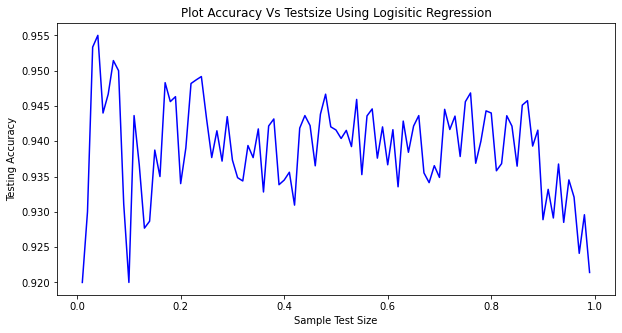

In [65]:
import numpy as np
#from array import array
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

test_size = np.arange(0.01,1,0.01)
accuracyl = []


for t in test_size:
    logreg = LogisticRegression()
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=t, random_state = 3)
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    Y_train = Y_train.reset_index(drop=True)
    Y_test = Y_test.reset_index(drop=True)
    logreg = LogisticRegression()
    logreg.fit(X_train,Y_train)
    Y_pred_logreg = logreg.predict(X_test)
    accuracyl.append(metrics.accuracy_score(Y_test,Y_pred_logreg))

plt.figure(figsize=(10,5))
plt.plot(test_size,accuracyl,color='b')
plt.xlabel('Sample Test Size')
plt.ylabel('Testing Accuracy')
plt.title('Plot Accuracy Vs Testsize Using Logisitic Regression')

Support Vector Machine

Text(0.5, 1.0, 'Plot Accuracy Vs Testsize Using Support Vector Machine')

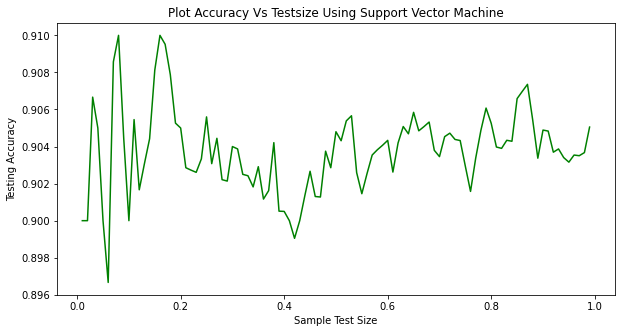

In [66]:
from sklearn.svm import SVC
from sklearn import metrics

accuracys = []

for t in test_size:

    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=t, random_state = 3)
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    Y_train = Y_train.reset_index(drop=True)
    Y_test = Y_test.reset_index(drop=True)
    model = SVC()
    model.fit(X_train,Y_train)
    Y_pred_SVC = model.predict(X_test)
    accuracys.append(metrics.accuracy_score(Y_test,Y_pred_SVC))
    
plt.figure(figsize=(10,5))
plt.plot(test_size,accuracys,color='g')
plt.xlabel('Sample Test Size')
plt.ylabel('Testing Accuracy')
plt.title('Plot Accuracy Vs Testsize Using Support Vector Machine')

K Nearest Neighbour

Text(0, 0.5, 'Mean Error')

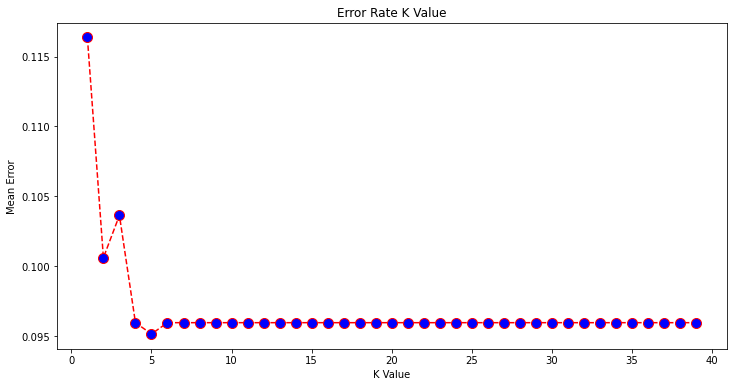

In [106]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

Y_pred_logreg = classifier.predict(X_test)

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))


plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## 7. Other classification algorithms and compare their performance

Comparing accuracies of different models with respect to sample sizes

A dataframe df has been craeted with the values of accuruacies of different models and different test sizes. This dataframe will contain the accuracies against the test sizes.

In [81]:
import numpy as np
import pandas as pd

t = test_size

l = accuracyl
s = accuracys
k5 = accuracyk5
n = accuracyn
rf = accuracyrf

df = pd.DataFrame({'test_size':t, 'Logistic Regression':l})
df.set_index('test_size',inplace=True)
df.head()

,Logistic Regression
test_size,
0.01,0.920000
0.02,0.930000
0.03,0.953333
0.04,0.955000
0.05,0.944000


The accuracies of different models have been plotted in a single frame where we can see that the random forest model is following a completely different trajectory as compared to other models. On the other hand, the slope of logistic regression and support vector machine goes hand in hand.

Text(0, 0.5, 'Accuracy')

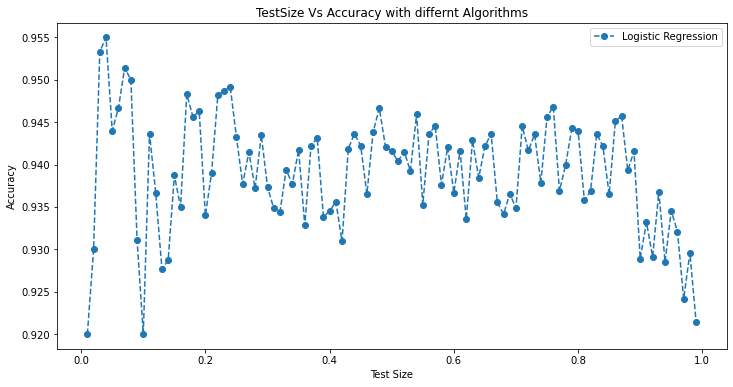

In [93]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ax = df.plot(legend=True, figsize=(12,6),linestyle='--',marker='o', title='TestSize Vs Accuracy with differnt Algorithms')
ax.set_xlabel("Test Size")
ax.set_ylabel("Accuracy")

A new dataframe has been created which contains maximum and minium values of the accuracies of the models.

The maximum and minimum values of the dataframe has been plotted in a single frame in order to compare 
the different slopes of different algorithms among each other. From the graph, it can be found that 
negative slope of the random forest algorithm is way more stipper as compare to other algorithms. 
The slope of logistic regression and support vector machines are almost equal.

 ## 8. Matrix related for evaluating the model performance

In [103]:
confusion_matrix = confusion_matrix(Y_test, Y_pred_logreg)
print(confusion_matrix)

[[4366  109]
 [ 280  195]]


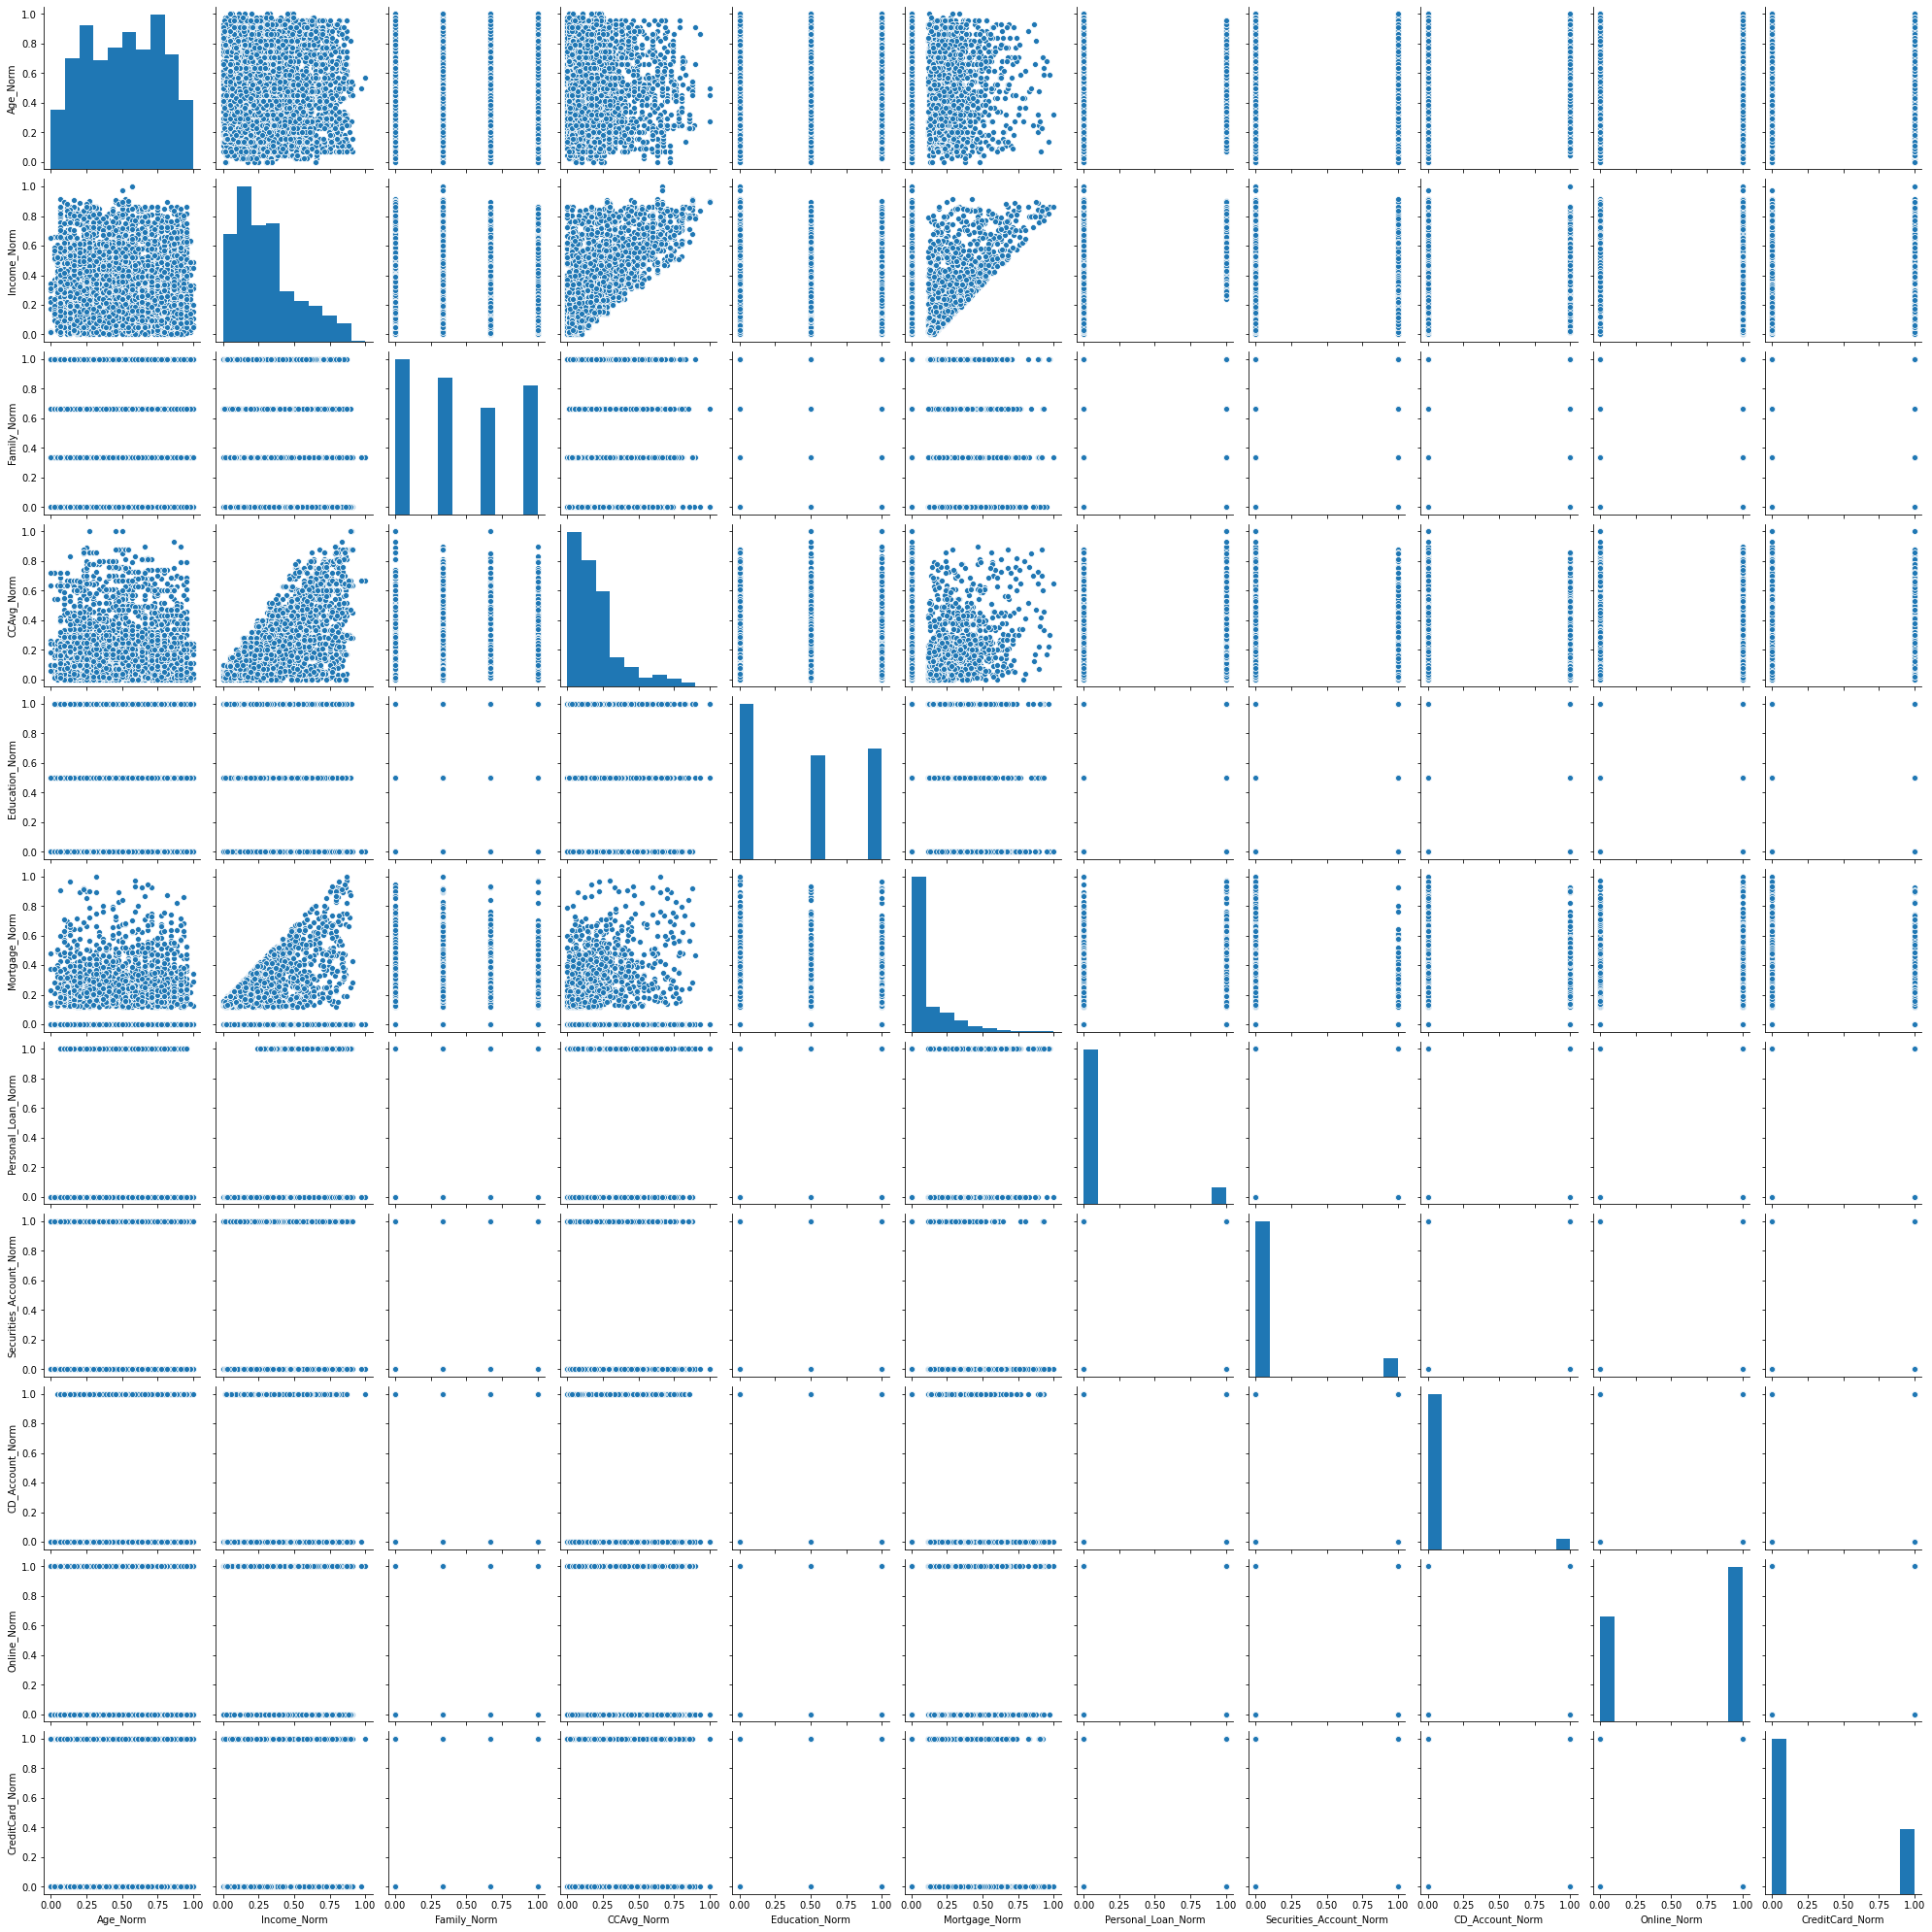

In [97]:
sns.pairplot(df_Norm)

Accuracy on test set: 0.8997979797979798
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      4475
           1       0.47      0.33      0.38       475

    accuracy                           0.90      4950
   macro avg       0.70      0.64      0.67      4950
weighted avg       0.89      0.90      0.89      4950



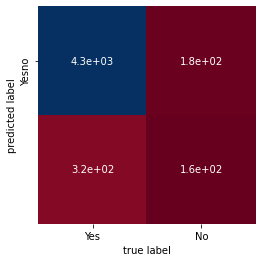

In [109]:
#print("Accuracy on test set:",metrics.accuracy_score(X_train,y_train))

# Model Accuracy, how often is the classifier correct?

print("Accuracy on test set:",metrics.accuracy_score(Y_test, Y_pred_logreg))

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(Y_test, Y_pred_logreg)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,xticklabels=['Yes', 'No'], yticklabels=['Yes' 'no'])
plt.xlabel('true label')
plt.ylabel('predicted label')

print(classification_report(Y_test, Y_pred))

Comaprative analysis of different models using pair plot after normalization

From the above graphs and analysis it is highly evident that the values of the acccuracies of Logistic Regression , Support Vector Machine , 
and K nearest neighbout = 5 are all more or less positively correlated among each other.

 ## 9. Business understanding of model

### Summary
We built an end-to-end project and tested different algorithms in this tutorial. This concludes this mini course on machine learning. Hope the course gave you a good primer to the machine learning concepts and boosted your overall confidence with machine learning.

### Next steps:

Continue working on more projects and build your portfolio
Learn more about various machine learning algorithms
Understand how the algorithms work behind the scenes and how we can fine tune it
Sign up and share your knowledge with others in this copycoding community